# Imports

In [310]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Overview

In [311]:
df = pd.read_csv('/Users/emre/Documents/IU Data Science/2022/3 Machine Learning - Unsupervised Project/archive/mental-heath-in-tech-2016_20161114.csv')

In [312]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

# Cleaning Data 

After an initial overview of the data, the first hurdle that stands out are the column names which are full questions instead of short and workable column names. In the first steps the columns will be renamed.

## Rename all columns to make further investigation easier

In order to optimize the truncation of the questions here are some abbreviations:
- mh = mental health
- ph = physical health
- neg = negative
- pos = pos
- diag = diagnosed
- prev = previous

In [313]:
columns_new = [
    'self_employed',
    'company_size',
    'tech_comp_flag',
    'tech_role_flag',
    'mh_coverage_flag',
    'mh_coverage_awareness_flag',
    'mh_employer_discussion_flag',
    'mh_resources_provided_flag',
    'mh_anonimity_flag',
    'mh_sick_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_coworkers',
    'mh_discussion_supervisor',
    'mh_versus_ph_employer',
    'mh_consequence_coworkers',
    'mh_coverage_flag2',
    'mh_online_resources_flag',
    'mh_diagnosed&reveal_clients_flag',
    'mh_diagnosed&reveal_clients_impact',
    'mh_diagnosed&reveal_coworkers_flag',
    'mh_coworkers_reveal_neg_impact',
    'mh_productivity_impact',
    'mh_productivity_impact_percentage',
    'prev_employers_flag',
    'prev_employers_mh_benefits',
    'prev_employers_mh_benefits_awareness',
    'prev_employers_mh_discussion',
    'prev_employers_mh_resources',
    'prev_employers_mh_anonimity',
    'prev_employers_mh_discuss_neg_consequences',
    'prev_employers_ph_discuss_neg_consequences',
    'prev_employers_mh_discussion_cowork',
    'prev_employers_mh_discussion_supervisor',
    'prev_employers_mh_importance_employer',
    'prev_employers_mh_consequences_coworkers',
    'future_employers_ph_specification',
    'why/why_not',
    'future_employers_mh_specification',
    'why/why_not2',
    'mh_hurt_on_career',
    'mh_neg_view_coworkers',
    'mh_sharing_friends/fam_flag',
    'mh_bad_response_workplace',
    'mh_for_others_bad_response_workplace',
    'mh_family_history',
    'mh_disorder_past',
    'mh_disorder_current',
    'yes_what_diag',
    'maybe_whats_your_diag',
    'mh_diag_professional',
    'yes_condition_diag',
    'mh_sought_professional_treatment',
    'mh_effective_treat_impact_on_work',
    'mh_not_effective_treat_impact_on_work',
    'age',
    'sex',
    'country_live',
    'live_us_teritory',
    'country_work',
    'work_us_teritory',
    'work_position',
    'remote_flag'
]

In [314]:
df.columns = columns_new

In [315]:
df.columns

Index(['self_employed', 'company_size', 'tech_comp_flag', 'tech_role_flag',
       'mh_coverage_flag', 'mh_coverage_awareness_flag',
       'mh_employer_discussion_flag', 'mh_resources_provided_flag',
       'mh_anonimity_flag', 'mh_sick_leave', 'mh_discussion_neg_impact',
       'ph_discussion_neg_impact', 'mh_discussion_coworkers',
       'mh_discussion_supervisor', 'mh_versus_ph_employer',
       'mh_consequence_coworkers', 'mh_coverage_flag2',
       'mh_online_resources_flag', 'mh_diagnosed&reveal_clients_flag',
       'mh_diagnosed&reveal_clients_impact',
       'mh_diagnosed&reveal_coworkers_flag', 'mh_coworkers_reveal_neg_impact',
       'mh_productivity_impact', 'mh_productivity_impact_percentage',
       'prev_employers_flag', 'prev_employers_mh_benefits',
       'prev_employers_mh_benefits_awareness', 'prev_employers_mh_discussion',
       'prev_employers_mh_resources', 'prev_employers_mh_anonimity',
       'prev_employers_mh_discuss_neg_consequences',
       'prev_employers

After changing the column names to more readable and shorter versions, we can easily view the values and types of entries next.

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   self_employed                               1433 non-null   int64  
 1   company_size                                1146 non-null   object 
 2   tech_comp_flag                              1146 non-null   float64
 3   tech_role_flag                              263 non-null    float64
 4   mh_coverage_flag                            1146 non-null   object 
 5   mh_coverage_awareness_flag                  1013 non-null   object 
 6   mh_employer_discussion_flag                 1146 non-null   object 
 7   mh_resources_provided_flag                  1146 non-null   object 
 8   mh_anonimity_flag                           1146 non-null   object 
 9   mh_sick_leave                               1146 non-null   object 
 10  mh_discussio

There are two things that immediately stand out:
1. The data type can be improved by adjusting objects, integers, and floats accordingly, and
2. there are a lot of missing values in this dataset

Let's get a visual on the missing values first.

## Dealing with missing values (NaN)

### Overview missing values

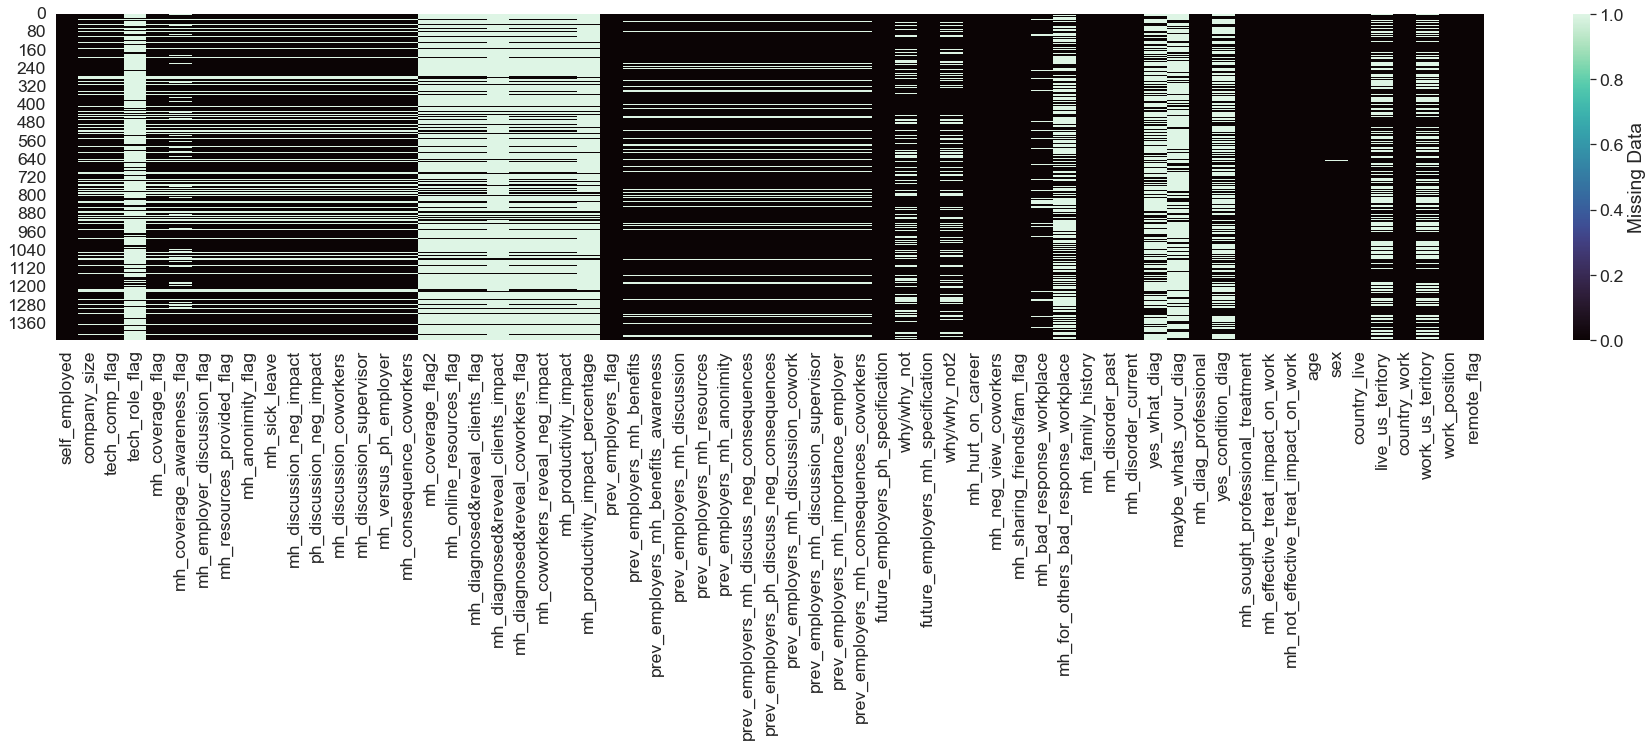

In [277]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data'})
plt.show()

# Saving the graph as png for later use
# plt.savefig("Missing_values_as_heatmap.png", dpi=300, format="png")

This graphic shows clearly that a lot of data is missing especially in the section after the second mental health coverage question comes up. It is going to be important to figure out why this section in particular wasn't answered by participants.
One of the striking features of this survey is that the questionof mental health healthcare coverge appears twice. The visualization also shows that there is a inverted relationship between answering the first part compared to the second part of healthcare questions. To further investigate this, let's confirm whether the second section of questions are aimed at self-employed survey takers.

### Clean data from self-employed survey-takers & columns for self-employed survey takers

In [278]:
# Count all employees survey takers(survey takers who are employed answered with 0 in the survey)
mask_employed = df.self_employed == 0

# count_employed = df[mask_employed].mh_coverage_flag2.isna().count()

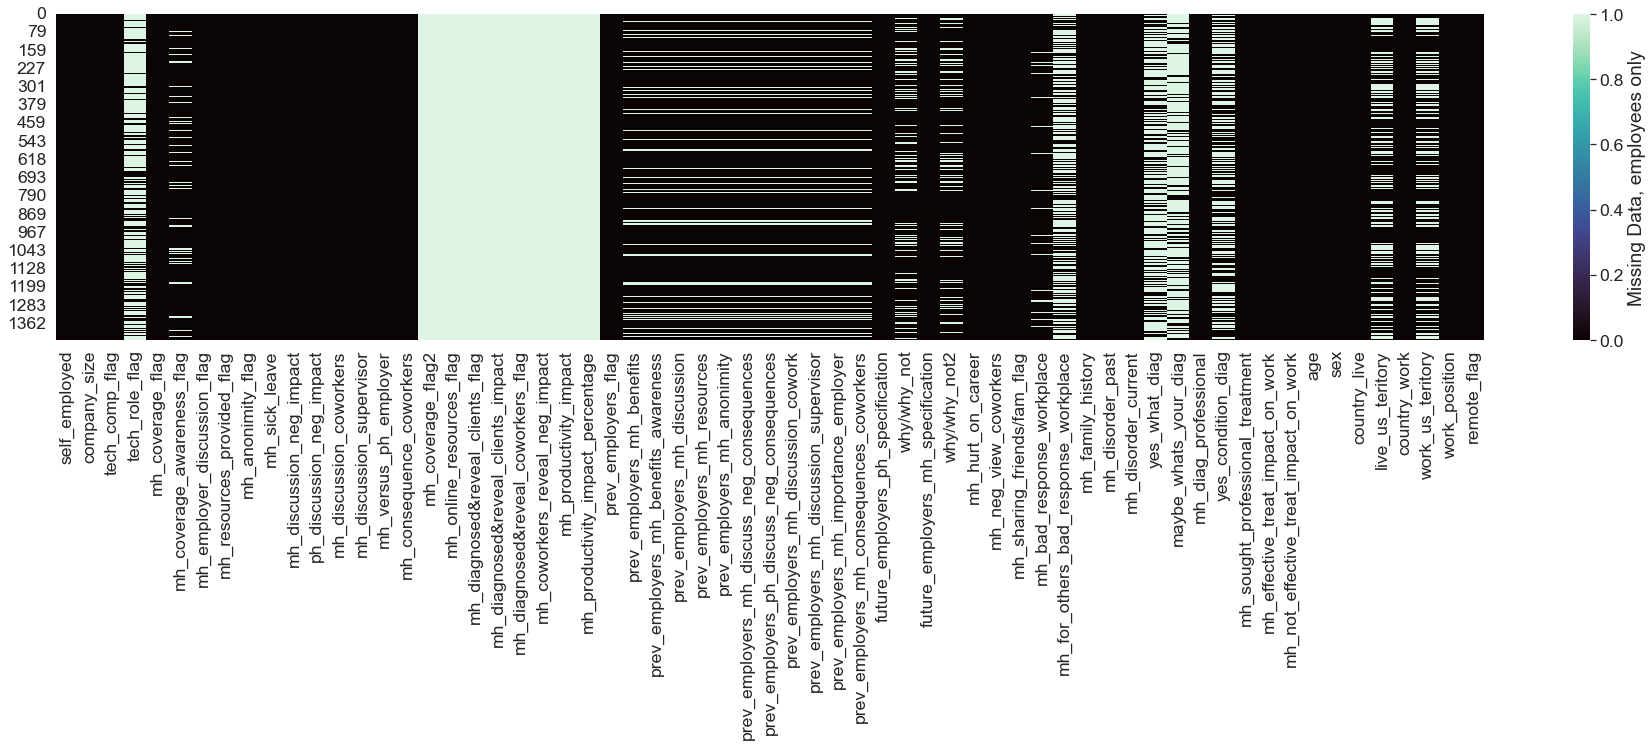

In [279]:
plt.figure(figsize=(32,6))
sns.heatmap(df[mask_employed].isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data, employees only'})
plt.show()
# plt.savefig("Missing_values_employed.png", dpi=300, format="png")

The initial suspicion of answers from `mh_coverage_flag2` to `mh_productivity_impact_percentage` being answered by self-employed survey takers was true. Because our company wants to analyze the mental health of other tech companies, all self-employed survey takers and the section `mh_coverage_flag2` to `mh_productivity_impact_percentage` can be dropped.

In [282]:
# Drop all rows having self-employed survey takers
df.drop(df[df.self_employed == 1].index, inplace=True)

# Drop the column `self_employed`
df.drop('self_employed',axis=1,inplace=True)

# Drop all columns referencing answer by only self-employed survey takers
df.drop(df.loc[:,'mh_coverage_flag2':'mh_productivity_impact_percentage'],axis=1,inplace=True)

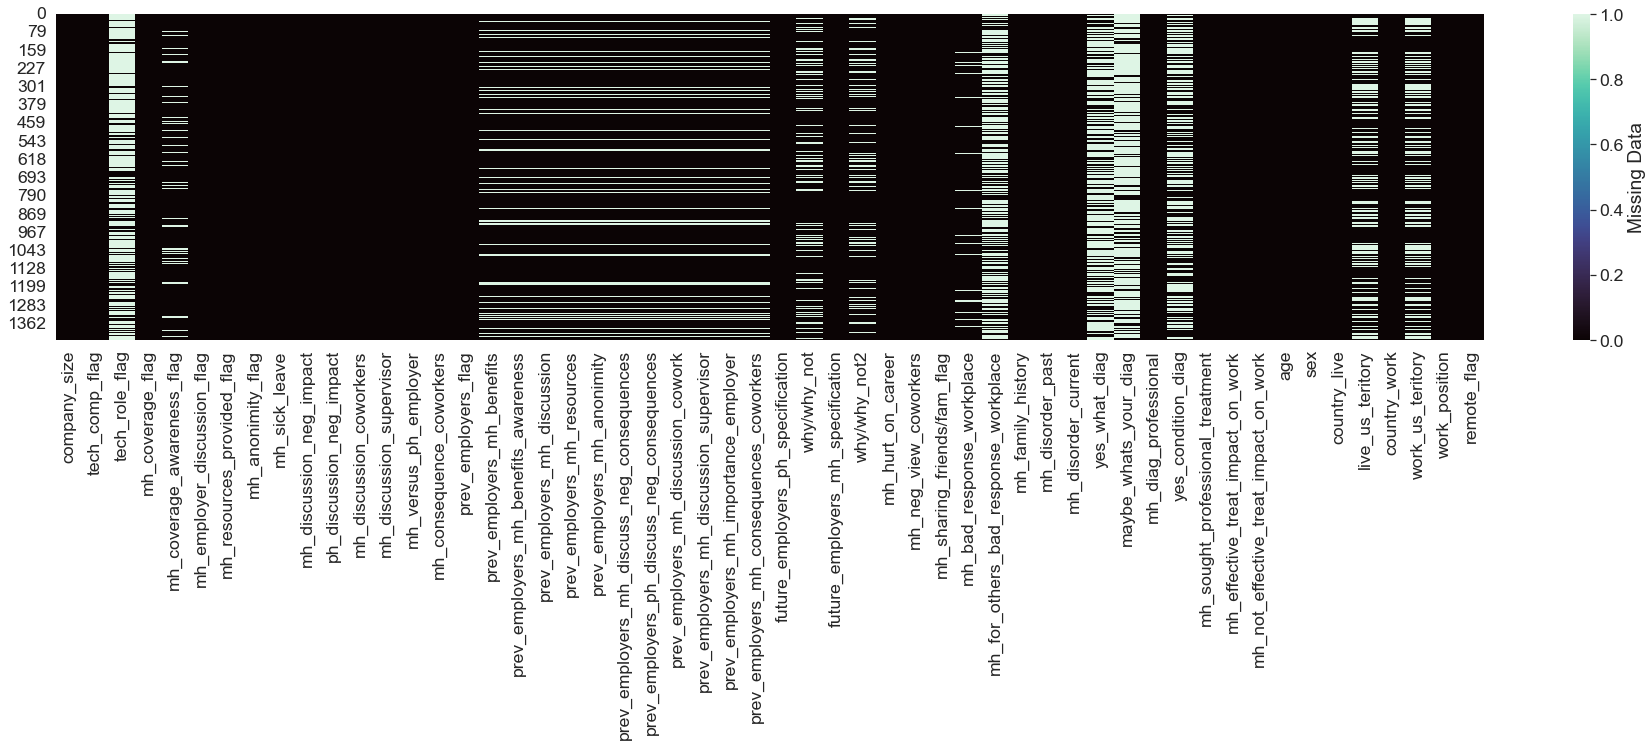

In [283]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data'})
plt.show()
# plt.savefig("Missing_values_cleaned_from_self-employed.png", dpi=300, format="png")

In [284]:
df.shape

(1146, 54)

The dataframe has been reduced to 1146 rows and 54 columns (originally 1433 rows & 64 columns)

### Dropping `tech_role_flag` ?
Is it possible that this question was omitted by non-tech survey takers? It is quite resonable to assume that as there are no NaN values in the `work position` column. Therefore, if the number of non-tech roles match the number of tech `work position`, then we could keep the column with valuable data.

In [285]:
df.tech_role_flag.value_counts()

1.0    248
0.0     15
Name: tech_role_flag, dtype: int64

In [286]:
df.work_position.value_counts()

Back-end Developer                                                                                                                            238
Front-end Developer                                                                                                                           116
Other                                                                                                                                          99
Supervisor/Team Lead                                                                                                                           60
Back-end Developer|Front-end Developer                                                                                                         58
DevOps/SysAdmin                                                                                                                                48
Front-end Developer|Back-end Developer                                                                                      

Given the fact that the discrepency is too high between the first two tech `work position` and the `tech_role_flag`, we can drop the column `tech_role_flag`

In [287]:
df.loc[:,'tech_role_flag']

0       NaN
1       NaN
2       NaN
4       1.0
5       NaN
6       NaN
7       NaN
8       1.0
10      NaN
11      1.0
12      NaN
13      1.0
14      NaN
15      NaN
16      NaN
17      NaN
19      1.0
20      NaN
21      1.0
22      NaN
23      NaN
25      1.0
26      1.0
27      NaN
28      1.0
29      NaN
30      NaN
31      NaN
32      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
41      NaN
42      NaN
44      1.0
45      NaN
47      NaN
49      NaN
50      NaN
51      NaN
53      NaN
54      1.0
55      0.0
56      NaN
57      1.0
58      1.0
59      1.0
60      NaN
61      1.0
62      NaN
66      0.0
67      NaN
68      NaN
69      1.0
71      NaN
72      1.0
73      NaN
74      NaN
75      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
83      NaN
85      NaN
86      NaN
87      NaN
89      NaN
90      1.0
91      NaN
92      NaN
93      NaN
94      1.0
95      NaN
96      NaN
97      NaN
99      NaN
100     NaN
101     NaN
102 

In [288]:
df.drop("tech_role_flag",axis=1,inplace=True)

### Dropping remaining columns with more than 50% of NaN values.

The remaining columns with more than 50% of missing values will not be useful and all `why/why_not` columns can not be used in our setting. Dropping following columns:

- `why/why_not`
- `why/why_not2`
- `mh_sought_professional_treatment`
- `mh_for_others_bad_response_workplace`
- `yes_what_diag`
- `maybe_whats_your_diag`
- `yes_condition_diag`

In [289]:
df.drop(['why/why_not','why/why_not2','mh_sought_professional_treatment',
         'yes_what_diag','maybe_whats_your_diag','mh_for_others_bad_response_workplace',
         'yes_condition_diag'], axis=1,inplace=True)

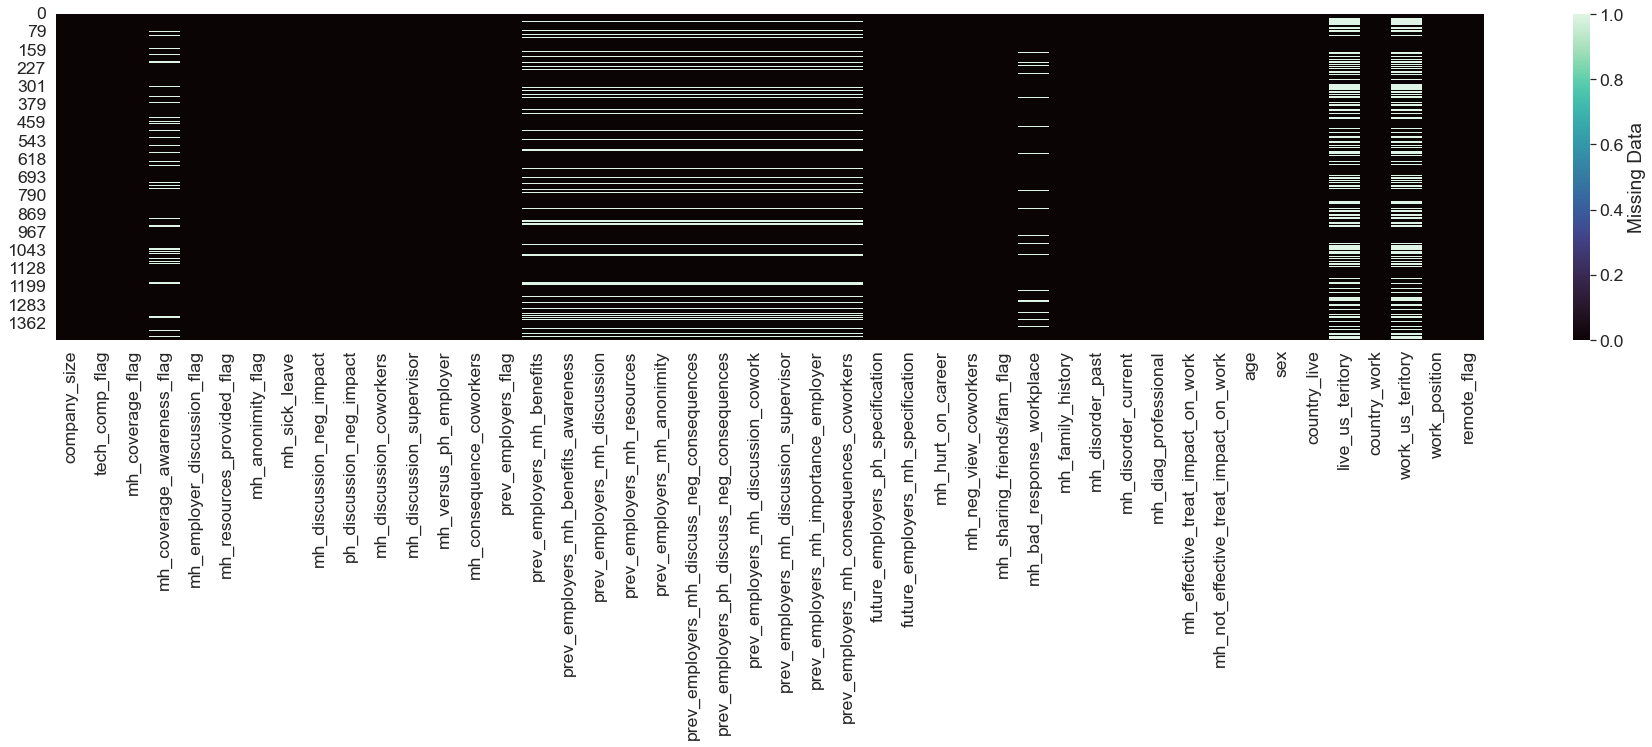

In [290]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap='mako',
            cbar_kws={'label': 'Missing Data'})
plt.show()
# plt.savefig("Missing_values_cleaned_from_self-employed.png", dpi=300, format="png")

### Adjust column entries & types

#### Check number of answers 

In [291]:
number_of_answers_dict = {}
for n in df.columns:
    number_of_answers_dict[n] = len(df[n].value_counts())

In [292]:
number_of_answers_dict

{'company_size': 6,
 'tech_comp_flag': 2,
 'mh_coverage_flag': 4,
 'mh_coverage_awareness_flag': 3,
 'mh_employer_discussion_flag': 3,
 'mh_resources_provided_flag': 3,
 'mh_anonimity_flag': 3,
 'mh_sick_leave': 6,
 'mh_discussion_neg_impact': 3,
 'ph_discussion_neg_impact': 3,
 'mh_discussion_coworkers': 3,
 'mh_discussion_supervisor': 3,
 'mh_versus_ph_employer': 3,
 'mh_consequence_coworkers': 2,
 'prev_employers_flag': 2,
 'prev_employers_mh_benefits': 4,
 'prev_employers_mh_benefits_awareness': 4,
 'prev_employers_mh_discussion': 4,
 'prev_employers_mh_resources': 3,
 'prev_employers_mh_anonimity': 4,
 'prev_employers_mh_discuss_neg_consequences': 4,
 'prev_employers_ph_discuss_neg_consequences': 3,
 'prev_employers_mh_discussion_cowork': 3,
 'prev_employers_mh_discussion_supervisor': 4,
 'prev_employers_mh_importance_employer': 4,
 'prev_employers_mh_consequences_coworkers': 3,
 'future_employers_ph_specification': 3,
 'future_employers_mh_specification': 3,
 'mh_hurt_on_career':

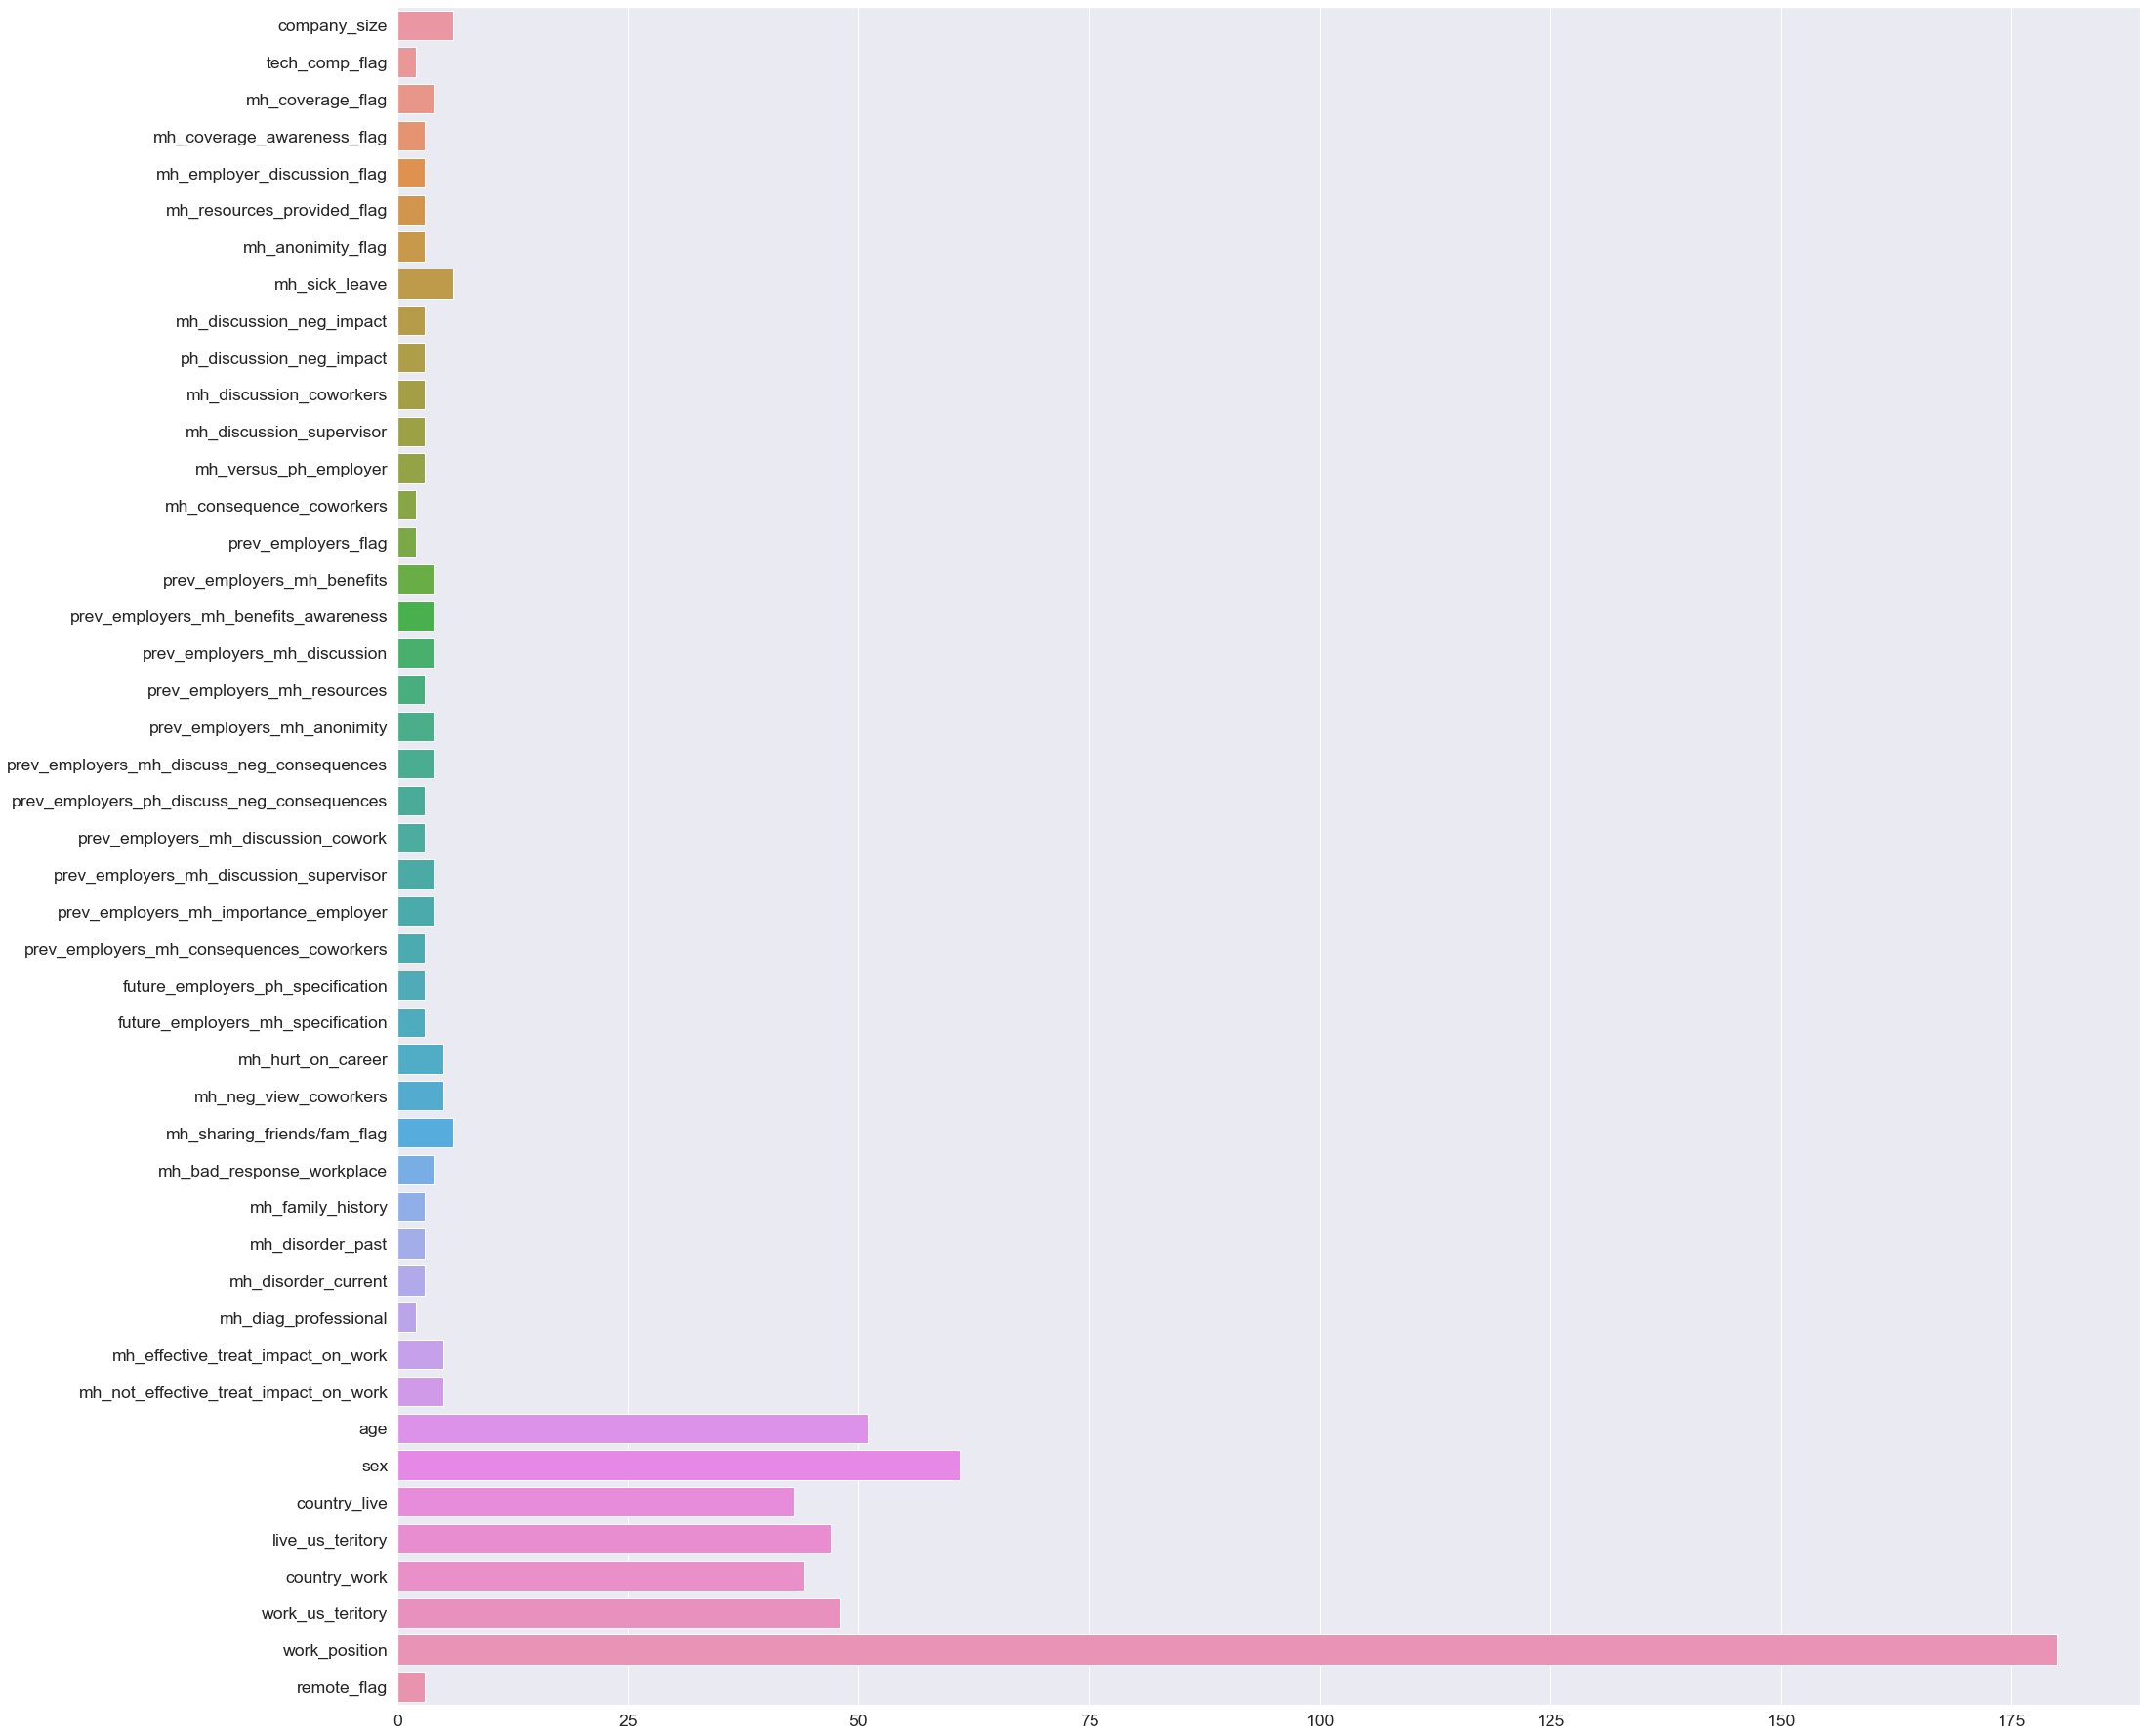

In [293]:
plt.figure(figsize=(32,32))
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys)
plt.show()
# plt.savefig("Number_of_answers_per_column.png", dpi=300, format="png")

#### Standartize gender spectrum

In [294]:
df.sex.value_counts()

Male                                                       505
male                                                       195
Female                                                     121
female                                                      79
M                                                           69
m                                                           56
F                                                           24
f                                                           20
Female                                                       6
Male                                                         5
woman                                                        4
non-binary                                                   4
Agender                                                      2
Male (cis)                                                   2
Woman                                                        2
man                                                    

In [295]:
male = ['Male', 'male', 'Male ', 'M', 'm','man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)',
        'Man', 'Sex is male','cis male', 'Malr', 'Dude', 
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
        'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)', 'cisdude', 'cis man', 'MALE']

female = ['Female', 'female', 'I identify as female.', 'female ','Female assigned at birth ', 'F', 'Woman',
          'fm', 'f', 'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)', 
          'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 
          'Female (props for making this a freeform field, though)',' Female', 'Cis-woman', 
          'female-bodied; no feelings about gender','AFAB']

other = ['Bigender', 'non-binary', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine',
         'none of your business', 'genderqueer', 'Human', 'Genderfluid','Enby', 'genderqueer woman', 'mtf',
         'Queer', 'Agender', 'Fluid','Nonbinary', 'human', 'Unicorn', 'Genderqueer','Genderflux demi-girl',
         'Transgender woman']

df["sex"].replace(to_replace=male, value='male', inplace=True)
df["sex"].replace(to_replace=female, value='female',inplace=True)
df["sex"].replace(to_replace=other, value='other',inplace=True)

In [296]:
df.sex.value_counts()

male      849
female    272
other      22
Name: sex, dtype: int64

#### Handle age outliers
The age column has some huge outliers shown by following graph:

In [297]:
df.age

0        39
1        29
2        38
4        43
5        42
6        30
7        37
8        44
10       28
11       34
12       30
13       44
14       35
15       52
16       32
17       34
19       31
20       26
21       35
22       25
23       33
25       42
26       27
27       35
28       34
29       32
30       32
31       30
32       31
34       36
35       33
36       44
37       29
38       29
39       44
41       40
42       46
44       41
45       33
47       45
49       37
50       37
51       27
53       36
54       34
55       31
56       30
57       32
58       40
59       40
60       41
61       27
62       30
66       35
67       29
68       28
69       27
71       28
72       46
73       40
74       37
75       41
77       38
78       33
79       33
80       21
81       36
83       35
85       45
86       41
87       35
89       24
90       33
91       35
92       26
93       17
94       29
95       26
96       36
97       46
99       28
100      40
101      23
102 

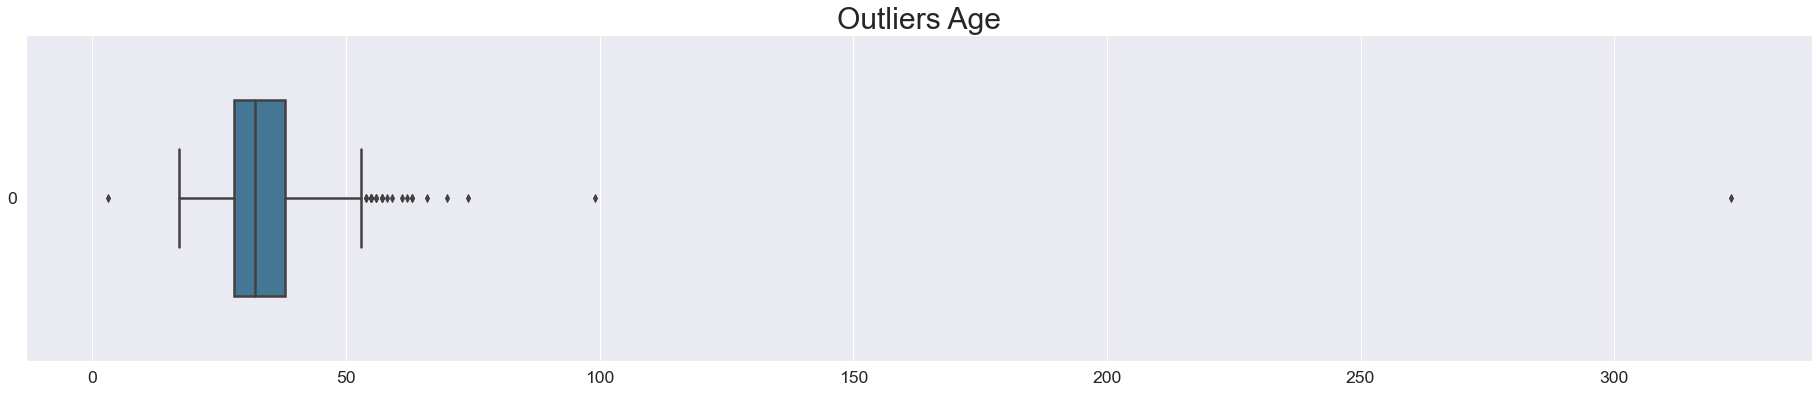

In [298]:
plt.figure(figsize=(32,6))
ax = sns.boxplot(data=df.age, palette='mako',orient='h',linewidth=2.5,width=.6 )
ax.set_title('Outliers Age', fontsize=30)
plt.show()

There are just two outliers in this column, however for future reference, all ages smaller than 14 and bigger than 120 will be replaced by the average age.

In [299]:
# Calculate the average age
mean_age = df.age.mean()

# Apply funciton which iterates over every entrie in the age column and replaces all values
#which are bigger than 120 and smaller than 14.
df.age = df.age.apply(lambda x: mean_age if x>=120 or x<=14 else x)

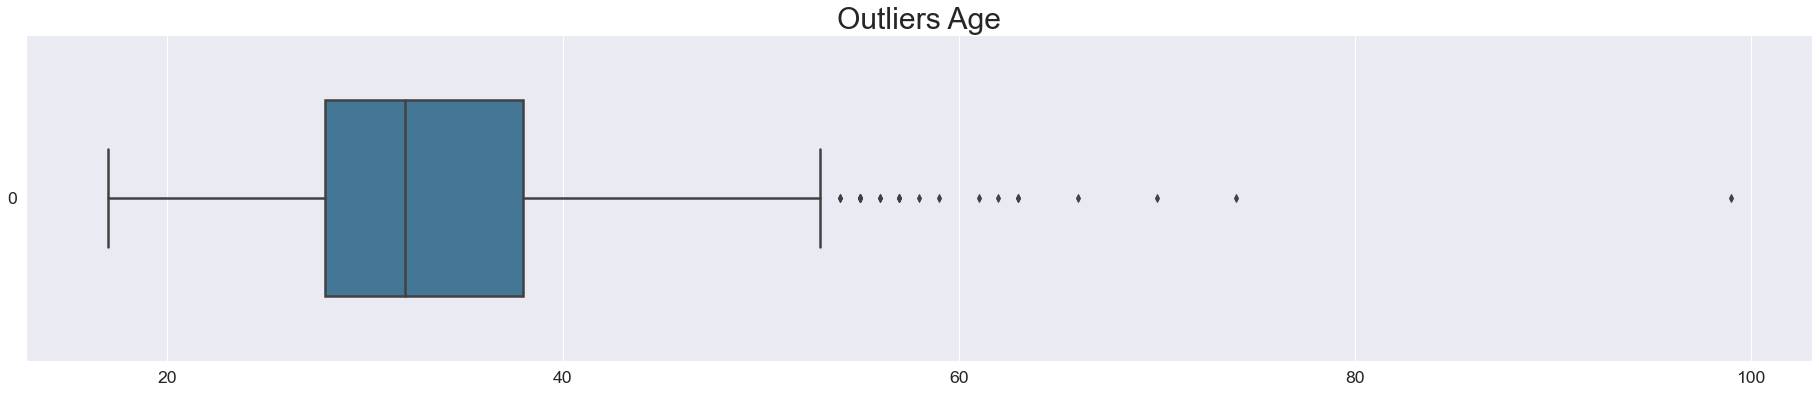

In [300]:
plt.figure(figsize=(32,6))
ax = sns.boxplot(data=df.age, palette='mako',orient='h',linewidth=2.5,width=.6 )
ax.set_title('Outliers Age', fontsize=30)
plt.show()

No more outliers in `age` column.

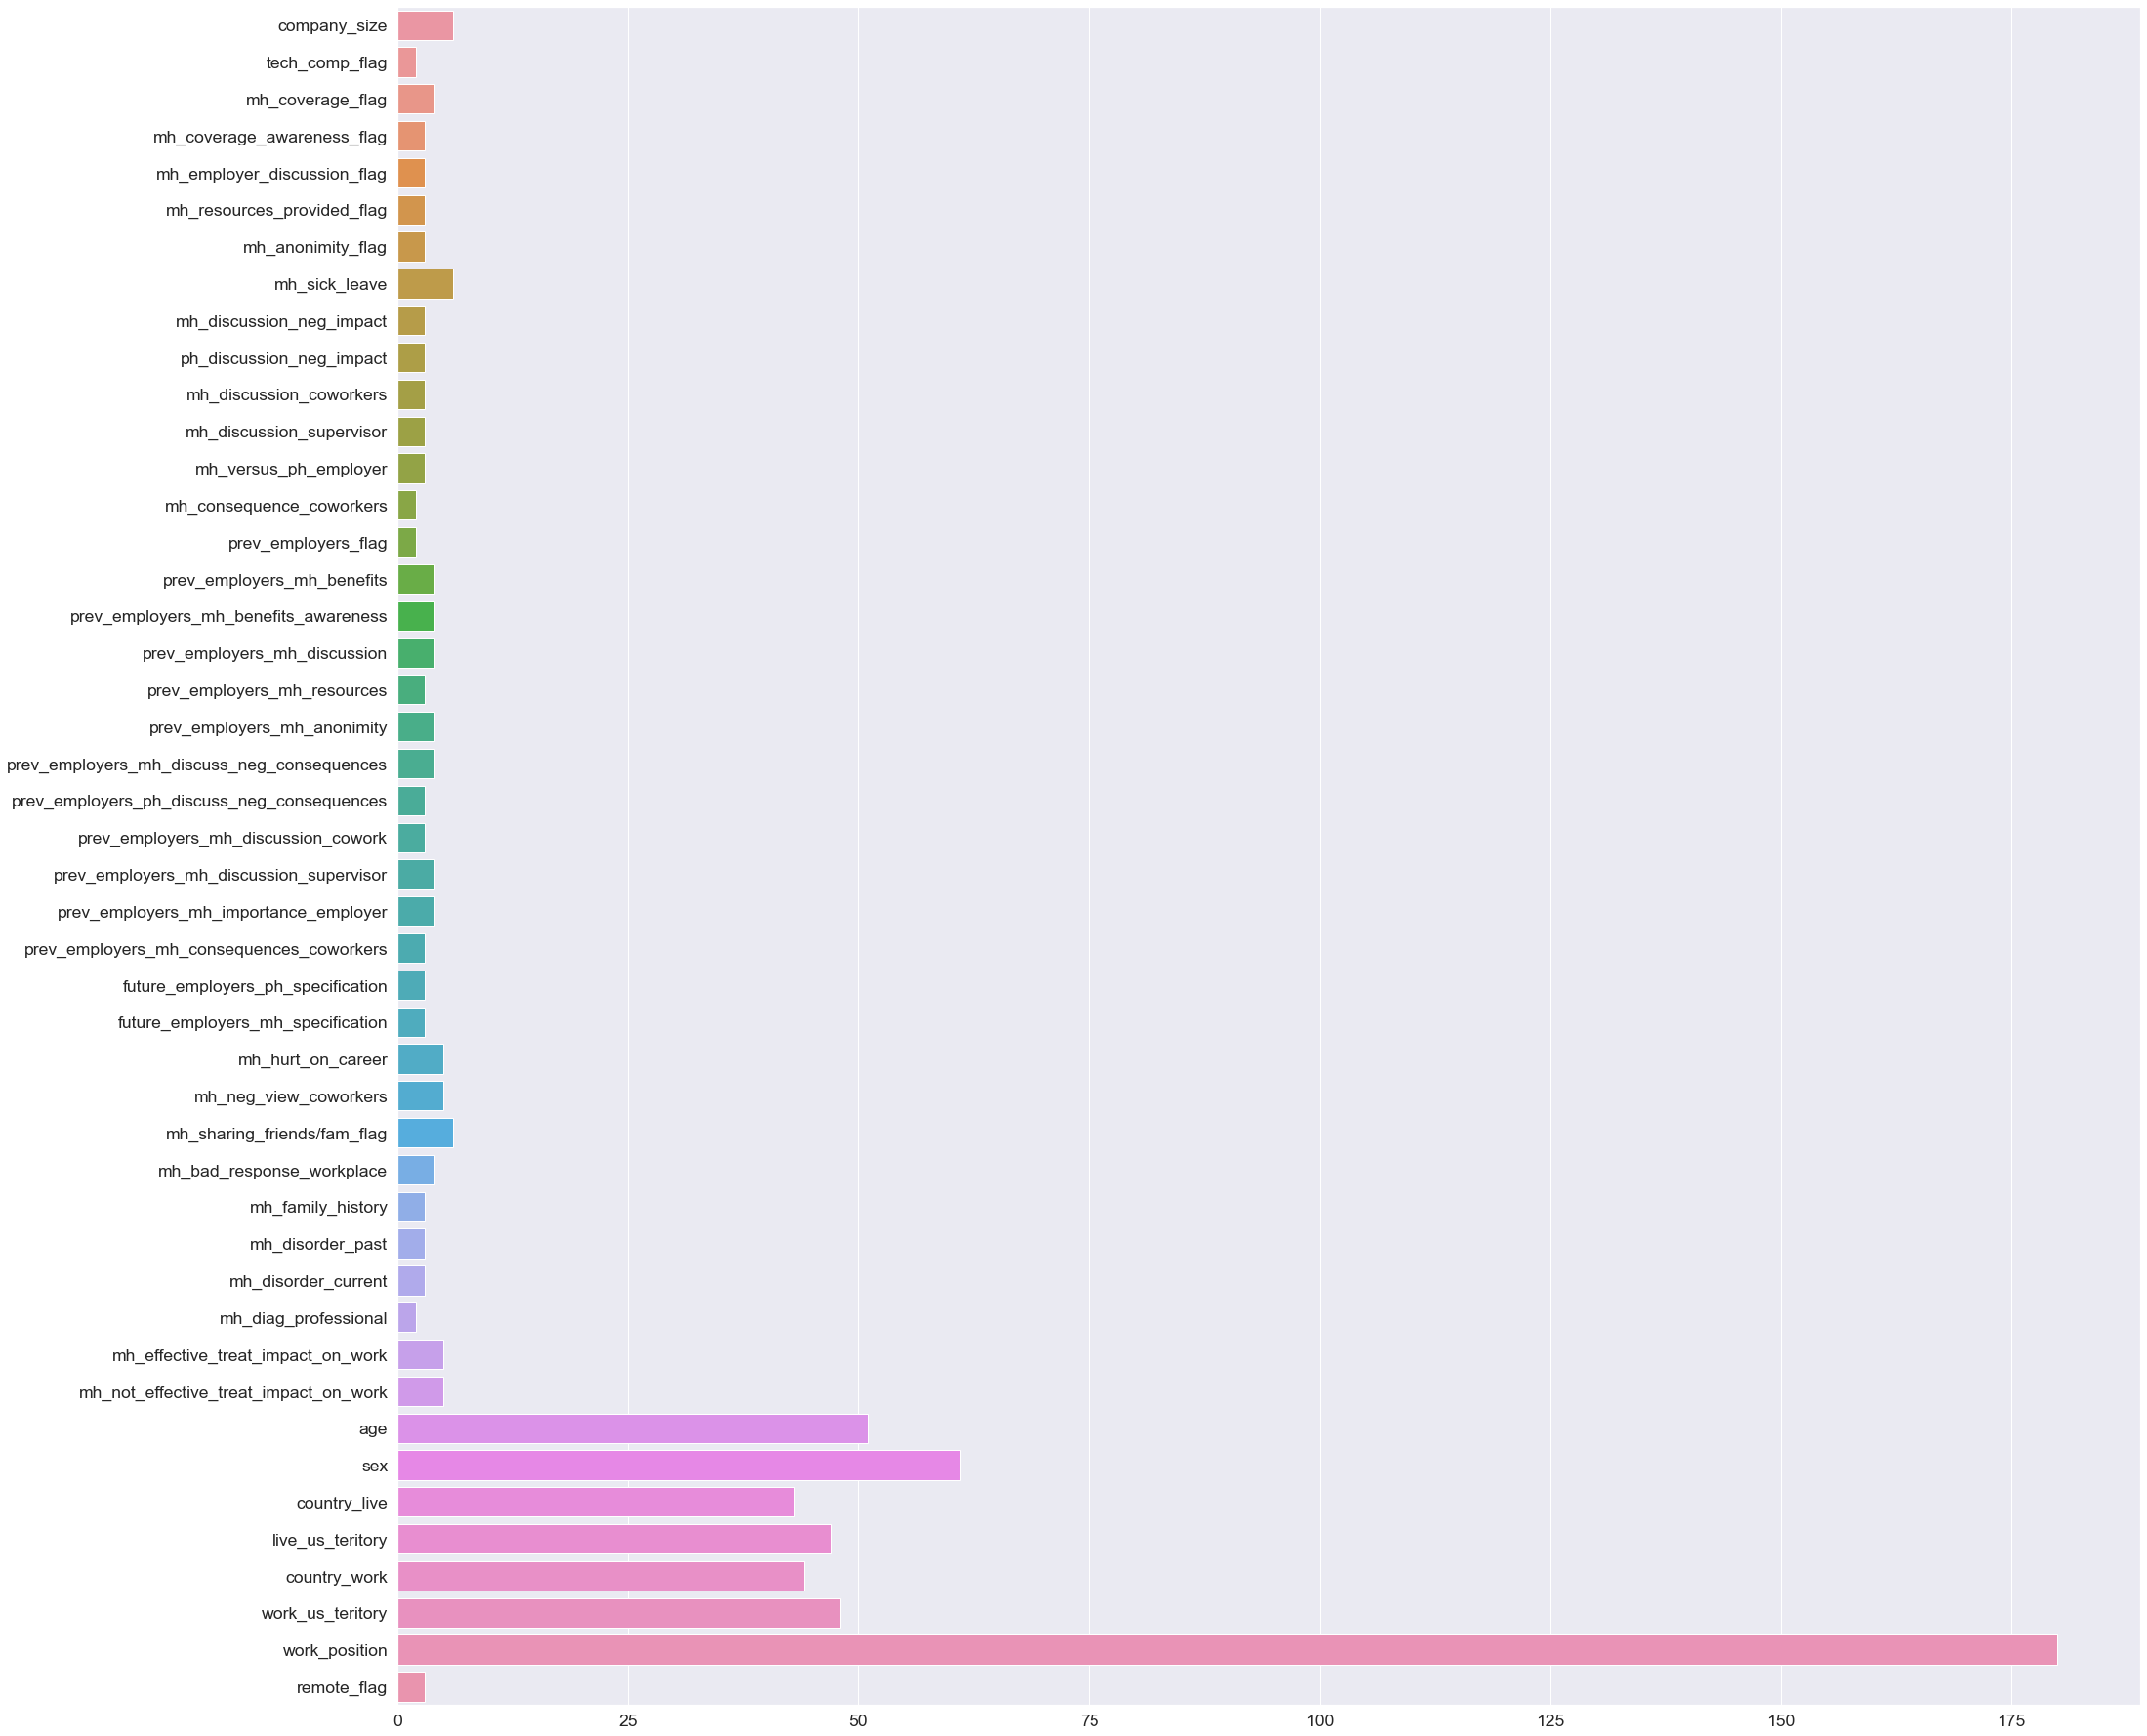

In [317]:
plt.figure(figsize=(32,32))
keys = list(number_of_answers_dict.keys())
vals = list(number_of_answers_dict.values())
sns.barplot(x=vals, y=keys)
plt.show()
# plt.savefig("Number_of_answers_per_column.png", dpi=300, format="png")

#### Change `company size` dtype and last segment

In [302]:
df.company_size.value_counts()

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: company_size, dtype: int64

In [307]:
df.company_size.replace(to_replace='More than 1000', value='>1000', inplace=True)

In [309]:
df.company_size.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1432
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   company_size                                1146 non-null   object 
 1   tech_comp_flag                              1146 non-null   float64
 2   mh_coverage_flag                            1146 non-null   object 
 3   mh_coverage_awareness_flag                  1013 non-null   object 
 4   mh_employer_discussion_flag                 1146 non-null   object 
 5   mh_resources_provided_flag                  1146 non-null   object 
 6   mh_anonimity_flag                           1146 non-null   object 
 7   mh_sick_leave                               1146 non-null   object 
 8   mh_discussion_neg_impact                    1146 non-null   object 
 9   ph_discussion_neg_impact                    1146 non-null   object 
 10  mh_discussio

# Transforming the features
Each feature is a long question which is very confusing to work with. Therefore, the features shall be renamed to reduce the complexity of each column.